In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
right_hand = pd.read_csv("/home/ubuntu/Desktop/project/HandRight.csv")
def addAlone(p):
    r = right_hand 
    r = r.iloc[:len(p)-1]
    r = r.reset_index(drop=True)
    r.drop('Time', inplace=True,axis=1)
    p.set_index(' Frame ID',inplace=True)
    p = p.reset_index(drop=True)
    f = pd.concat([p,r],axis=1)
    f = f.drop([' Hand Type',' # hands',' Frame ID'],axis=1)
    return f
def addOther(p):
    r = p[p[' Hand Type']=='right']
    r.drop('Time', inplace=True,axis=1)
    l = p[p[' Hand Type']=='left']
    r.set_index(' Frame ID',inplace=True)
    l.set_index(' Frame ID',inplace=True)
    f = pd.DataFrame(pd.merge(l,r, how='left',on=' Frame ID'))
    f = f.drop([' Hand Type_x',' # hands_y' ,' Hand Type_y' ,' # hands_x'],axis=1)
    return f
def addDf(p,name,exp):
    p = p.iloc[701:]
    if 'Alone' not in exp:
        f = addOther(p)
    else:
        f = addAlone(p) 
    f.columns = ['Time', ' Position X', ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength', ' Position X r',
       ' Position Y r', ' Position Z r', ' Velocity X r', ' Velocity Y r',
       ' Velocity Z r', ' Pitch r', ' Roll r', ' Yaw r', ' Wrist Pos X r',
       ' Wrist Pos Y r', ' Wrist Pos Z r', ' Elbow pos X r', ' Elbow Pos Y r',
       ' Elbow Pos Z r', ' Grab Strenth r', ' Grab Angle r', ' Pinch Strength r']
    f.insert(loc=0, column='Name', value=name)
    f.insert(loc=1, column='Type', value=exp)
    return f

In [3]:
def loadData(pathW):
    df = pd.DataFrame(columns=[
        'Name',
        'Type',
        'Time',
        ' Position X',
        ' Position Y',
        ' Position Z',
        ' Velocity X',
        ' Velocity Y',
        ' Velocity Z',
        ' Pitch',
        ' Roll',
        ' Yaw',
        ' Wrist Pos X',
        ' Wrist Pos Y',
        ' Wrist Pos Z',
        ' Elbow pos X',
        ' Elbow Pos Y',
        ' Elbow Pos Z',
        ' Grab Strenth',
        ' Grab Angle',
        ' Pinch Strength',
        ' Position X r',
        ' Position Y r',
        ' Position Z r',
        ' Velocity X r',
        ' Velocity Y r',
        ' Velocity Z r',
        ' Pitch r',
        ' Roll r',
        ' Yaw r',
        ' Wrist Pos X r',
        ' Wrist Pos Y r',
        ' Wrist Pos Z r',
        ' Elbow pos X r',
        ' Elbow Pos Y r',
        ' Elbow Pos Z r',
        ' Grab Strenth r',
        ' Grab Angle r',
        ' Pinch Strength r',
        ])
    path = pathW
    import os
    for folder in os.listdir(path):
        c_A = 0
        c_Sp = 0
        c_Sy = 0
        for fu in os.listdir(path + folder):
            if 'Alone' in fu:
                c_A += 1
            elif 'Sync' in fu:
                c_Sy += 1
            else:
                c_Sp += 1
        for fu in os.listdir(path + folder):
            if 'Alone' in fu and c_A != 1:
                c_A -= 1
                continue
            elif 'Sync' in fu and c_Sy != 1:
                c_Sy -= 1
                continue
            elif 'Spontan' in fu and c_Sp != 1:
                c_Sp -= 1
                continue
            x = pd.read_csv(path + folder + '/' + fu)
            df = pd.concat([df, addDf(x, ''.join(filter(str.isalpha,
                           fu[:8])), ''.join(filter(str.isalpha,
                           fu[8:len(fu) - 3])))], sort=False)
    return df

In [4]:
train = loadData("/home/ubuntu/Desktop/project/Training/")
test = loadData("/home/ubuntu/Desktop/project/Validation/")

/home/ubuntu/Downloads/media/ubuntu/usbdata/tools/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
train.dropna(inplace=True)
test.dropna(inplace=True)
x_train = train.drop(['Name','Type'], axis = 1)
y_train = train['Type']
x_test = test.drop(['Name','Type'], axis = 1)
y_test = test['Type']

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
scores = knn.score(x_test, y_test)
#scores = cross_val_score(knn, x_train, y_train, cv=2, scoring='accuracy')
print(scores)

0.7348900169204737


In [7]:
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(x_train)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.reset_index(drop=True, inplace=True)
final = pd.concat([principalDf, y_train.reset_index(drop=True)],axis=1)
final.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Type
0,-126.029619,255.735316,-128.474792,-7.683298,-55.381272,-54.286166,-39.122748,-81.807937,-10.885778,-34.730564,...,-62.260742,-10.113337,-4.157756,-14.889303,0.153949,-9.256331,0.036519,3.706657,3.155133,Sync
1,-110.589600,197.633802,-127.564039,-4.553151,-55.880820,-47.254755,-53.201244,-81.022444,44.170016,-52.536468,...,-59.828056,-11.950101,-3.563914,-13.249906,0.162508,-8.684657,0.211110,3.403837,3.112969,Sync
2,-91.281904,123.673533,-126.120669,-3.330491,-53.382365,-47.306340,-64.214961,-78.075529,71.430340,-61.583228,...,-57.852525,-13.383369,-2.953356,-11.742912,0.751652,-8.380801,0.620464,3.177505,3.079944,Sync
3,-79.267303,113.571259,-126.125456,0.771326,-52.414248,-50.836364,-61.775561,-76.001535,55.924468,-61.098851,...,-55.808368,-12.550713,-3.490000,-11.207754,0.442080,-8.039083,0.827910,3.204292,3.049026,Sync
4,-88.143056,162.603954,-127.049294,11.985858,-52.543777,-56.836761,-62.738692,-75.243780,39.967512,-60.492063,...,-53.844897,-11.432732,-4.262184,-11.176919,-0.158215,-7.662674,0.955583,3.256256,3.039901,Sync


In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, principalDf, y_train, cv=2, scoring='accuracy')
print(scores.mean())

0.8091780385500194


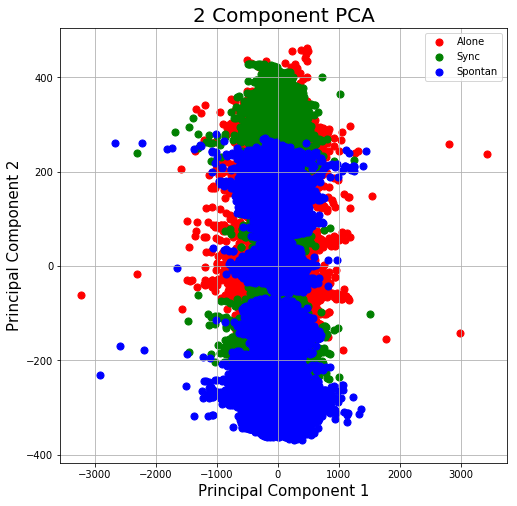

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Alone', 'Sync', 'Spontan']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final['Type'] == target
    ax.scatter(final.loc[indicesToKeep, 1]
               , final.loc[indicesToKeep, 2]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Type
Alone      AxesSubplot(0.125,0.125;0.775x0.755)
Spontan    AxesSubplot(0.125,0.125;0.775x0.755)
Sync       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

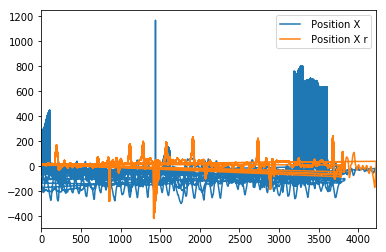

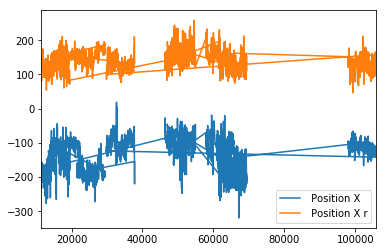

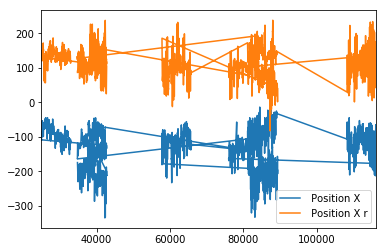

In [10]:
train.groupby(['Type'])[' Position X', ' Position X r'].plot()

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, x_train, y_train, cv=2, scoring='accuracy').mean())

/home/ubuntu/Downloads/media/ubuntu/usbdata/tools/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/Downloads/media/ubuntu/usbdata/tools/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ubuntu/Downloads/media/ubuntu/usbdata/tools/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/Downloads/media/ubuntu/usbdata/tools/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


0.7953648194967331


Text(0, 0.5, 'Cross-Validated Accuracy')

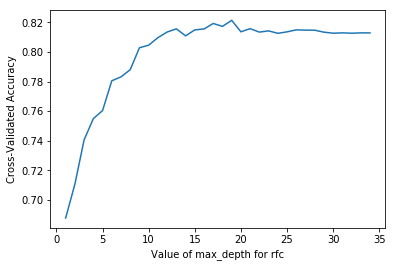

In [19]:
from sklearn.ensemble import RandomForestClassifier
d_range = list(range(1, 35))
d_scores = []
for d in d_range:
    rfc = RandomForestClassifier(n_estimators=100, max_depth=d,random_state=1,n_jobs=-1)
    scores = cross_val_score(rfc, final.drop(['Type'], axis=1), y_train, cv=2, scoring='accuracy')
    d_scores.append(scores.mean())


# plot the value of max_depth for rfc (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(d_range, d_scores)
plt.xlabel('Value of max_depth for rfc')
plt.ylabel('Cross-Validated Accuracy')